# Lesson 9 - Data Transformations

Quick links:
[9.1 - Log-transforming Only the Predictor for SLR](#)
[9.2 - ](#)
[9.3 - ](#)
[9.4 - ](#)
[9.5 - ](#)
[9.6 - ](#)
[9.7 - ](#)
[9.8 - ](#)
[9.9 - ](#)
[9.10 - ](#)

Reference:
[Online Note Lesson 9](https://online.stat.psu.edu/stat501/lesson/9/)
[ML graph with Plotly](https://plotly.com/python/ml-regression/)

In [11]:
import os
import warnings

import lmdiag
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.io as pio
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

from utils.config import data_path

pio.templates.default = 'simple_white'
warnings.filterwarnings("ignore")

In [2]:
# pipeline
def simple_ols(df, x , y):
    reg = smf.ols(formula=f'{y} ~ {x}', data=df).fit()
    print('ANOVA')
    print('='*78)
    print(anova_lm(reg))
    print('='*78)
    print(reg.summary())
    return reg

# Log-transforming Only the Predictor for SLR

In [5]:
# word recall data
df = pd.read_csv(os.path.join(data_path, 'wordrecall.txt'), delimiter='\t')

# prop vs time plot
fig = px.scatter(df, x='time', y='prop', width=600, height=400, trendline='ols', trendline_color_override='red',
                 title='Prop vs. time')
fig.show()

# regression
reg = simple_ols(df, x='time', y='prop')

ANOVA
            df    sum_sq   mean_sq          F    PR(>F)
time       1.0  0.339336  0.339336  14.632568  0.002817
Residual  11.0  0.255095  0.023190        NaN       NaN
                            OLS Regression Results                            
Dep. Variable:                   prop   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     14.63
Date:                Sun, 24 Oct 2021   Prob (F-statistic):            0.00282
Time:                        22:10:12   Log-Likelihood:                 7.1057
No. Observations:                  13   AIC:                            -10.21
Df Residuals:                      11   BIC:                            -9.082
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err    

<module 'matplotlib.pyplot' from 'D:\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

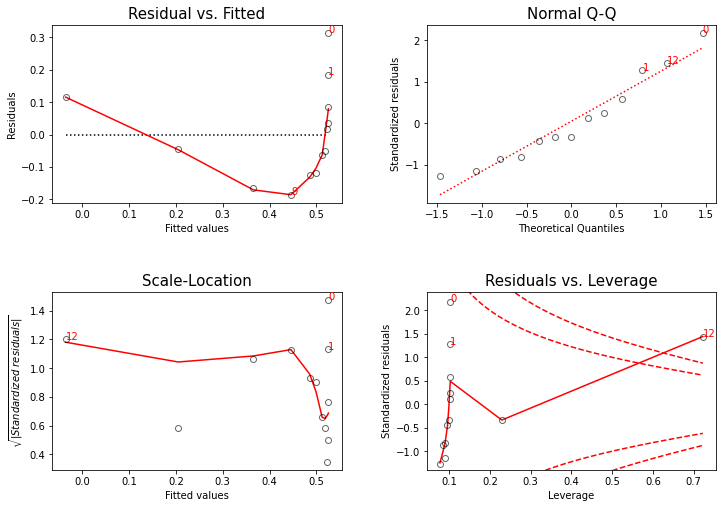

In [9]:
# diagnostic plots
plt.figure(figsize=(10, 7))
lmdiag.plot(reg)

Statsmodel provide a handy transformation short cut through their function. However, I prefer to transform the variable by my own and then fit it into the statsmodel.

In [15]:
# transform log x
df['ln_time'] = np.log(df['time'])

# refit prop vs ln time
fig = px.scatter(df, x='ln_time', y='prop', width=600, height=400, trendline='ols', trendline_color_override='red',
                 title='Prop vs. log time')
fig.show()

# regression
reg = simple_ols(df, x='ln_time', y='prop')

ANOVA
            df    sum_sq   mean_sq            F        PR(>F)
ln_time    1.0  0.588414  0.588414  1075.703494  2.525248e-12
Residual  11.0  0.006017  0.000547          NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                   prop   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1076.
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           2.53e-12
Time:                        22:22:54   Log-Likelihood:                 31.462
No. Observations:                  13   AIC:                            -58.92
Df Residuals:                      11   BIC:                            -57.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 c

<module 'matplotlib.pyplot' from 'D:\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

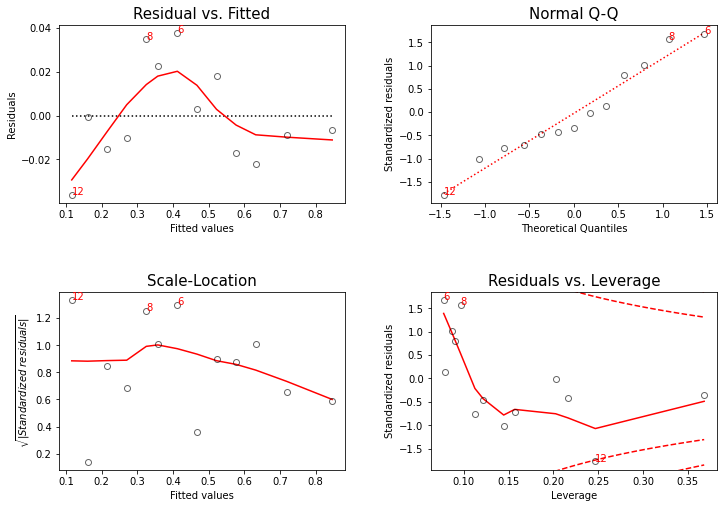

In [17]:
# diagnostic plots
plt.figure(figsize=(10,7))
lmdiag.plot(reg)

### Transforming y

In [19]:
# power y by -1.25
df['power_prop'] = df['prop']**-1.25

# plot
fig = px.scatter(df, x='time', y='power_prop', width=600, height=400, trendline='ols', trendline_color_override='red',
                 title='Prop**-1.25 vs. time')
fig.show()

# regression
reg = simple_ols(df, x='time', y='power_prop')

ANOVA
            df      sum_sq     mean_sq           F        PR(>F)
time       1.0  424.603262  424.603262  291.266306  2.908699e-09
Residual  11.0   16.035620    1.457784         NaN           NaN
                            OLS Regression Results                            
Dep. Variable:             power_prop   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     291.3
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           2.91e-09
Time:                        22:28:17   Log-Likelihood:                -19.810
No. Observations:                  13   AIC:                             43.62
Df Residuals:                      11   BIC:                             44.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
         

<module 'matplotlib.pyplot' from 'D:\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

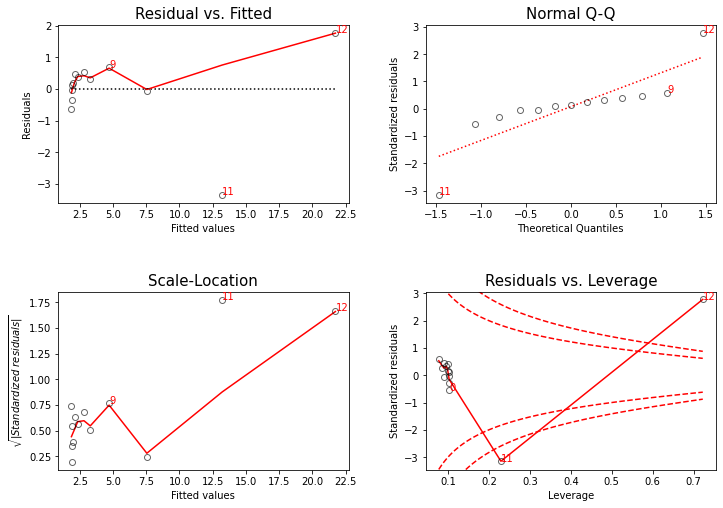

In [20]:
# diagnostic plots
plt.figure(figsize=(10,7))
lmdiag.plot(reg)